In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [39]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [50]:
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")
# engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [51]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [52]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurements', 'stations']

In [53]:
# Save references to each table
M = Base.classes.measurements
S = Base.classes.stations
print(M, S)

<class 'sqlalchemy.ext.automap.measurements'> <class 'sqlalchemy.ext.automap.stations'>


In [54]:
# Create our session (link) from Python to the DB
# session = Session(engine)
session = Session(bind=engine)
session

# Exploratory Climate Analysis

In [24]:
# Base.prepare()
# m = session.query(M)
# print(m)
# # for r in m:
# #     print(r.id)
# m.__dict__

# m = session.query(Measurements).first()
# m.__dict__
# print(help(plt.plot))


In [58]:
for row in session.query(S.station, S.name):
    print(row)

In [13]:
precip = session.query(Measurement).filter(Measurement.date == '2010-01-09').all()
for p in precip:
    print(p.date, p.prcp, p.id)

NameError: name 'Measurement' is not defined

<IPython.core.display.Javascript object>


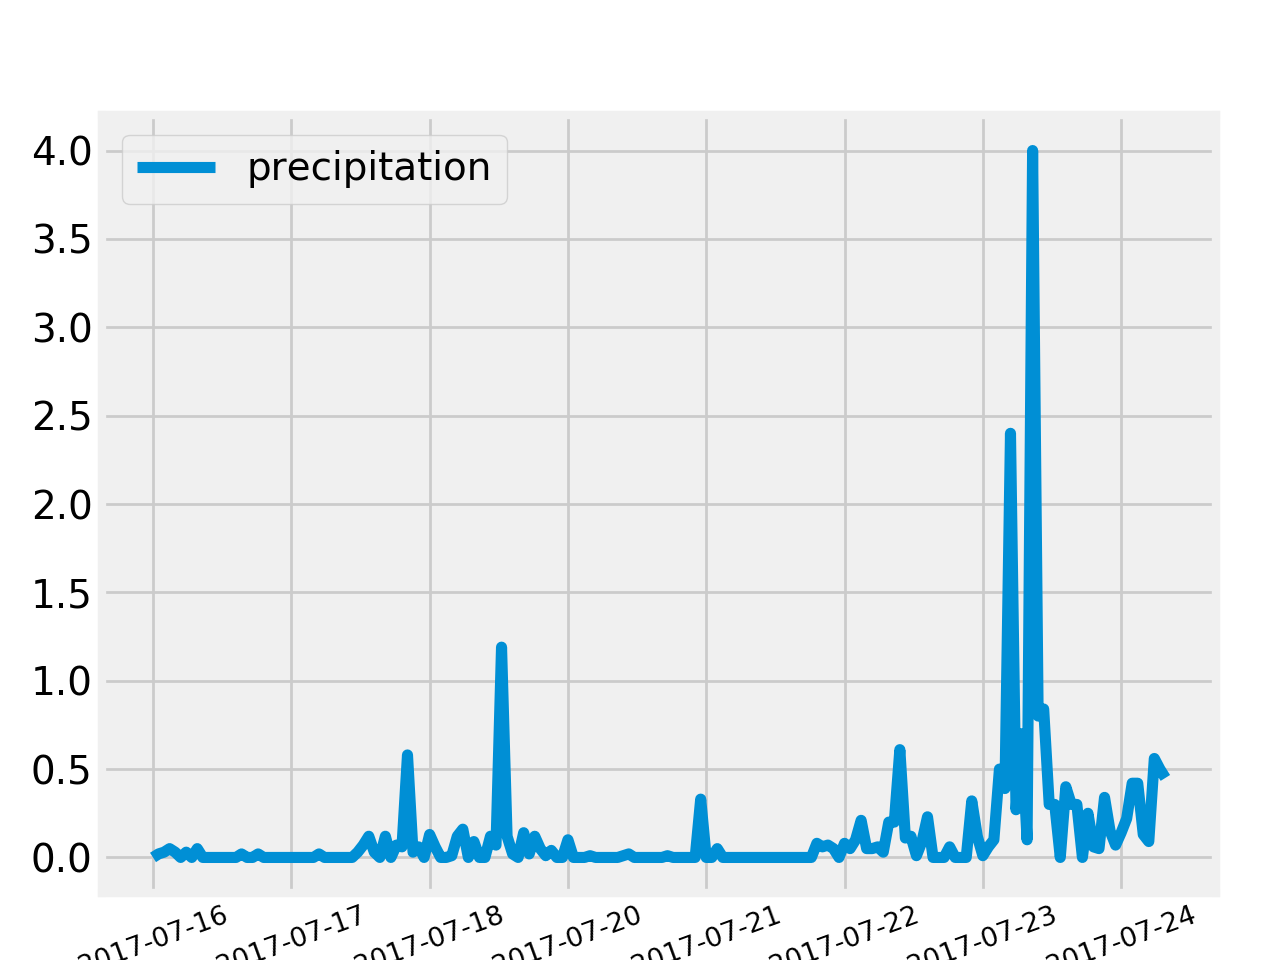

In [195]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results  
   
# Calculate the date 1 year ago from today
d = dt.date.today() - dt.timedelta(days=365)
# print(d)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement).filter(Measurement.date > d).all()
    
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_yr = []
for p in precip:
    prcp_yr.append(dict(date=p.date, station=p.station, precipitation=p.prcp))

# Sort the dataframe by date
prcp_yr = pd.DataFrame(prcp_yr).set_index('date')

# Use Pandas Plotting with Matplotlib to plot the data, Rotate the xticks for the dates
prcp_yr.plot().set_xticklabels(prcp_yr.index, rotation=20, size='x-small')

plt.show()

In [197]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_yr.describe()

,precipitation
count,184.000000
mean,0.125109
std,0.376797
min,0.000000
25%,0.000000
50%,0.010000
75%,0.100000
max,4.000000


In [254]:
# How many stations are available in this dataset?
# n_stations = session.query(Measurement.station).distinct().count()
# print(n_stations)
session.query(func.count(Measurement.station.distinct())).all()

[(9)]

In [363]:
# What are the most active stations?
# List the stations and the counts in descending order.
sel = [Measurement.station, 
       func.count(Measurement.station)
      ]
active = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc())

active.all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [364]:
active.first()

('USC00519281', 2772)

In [365]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active, count = active.first()
sel = [Measurement.station,
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)
      ]
session.query(*sel).\
    filter(Measurement.station == most_active).\
    order_by(Measurement.tobs).all()

[('USC00519281', 54, 85, 71.66378066378067)]

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_tobs = session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).first()
mt = most_tobs[0] 
print(mt)

mtdata = session.query(Measurement.tobs).\
    filter(Measurement.station == mt).all()
    
tmps = pd.DataFrame(mtdata, columns=['tobs'])
print(len(tmps))
tmps.head()
tmps.plot.hist(bins=20)
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


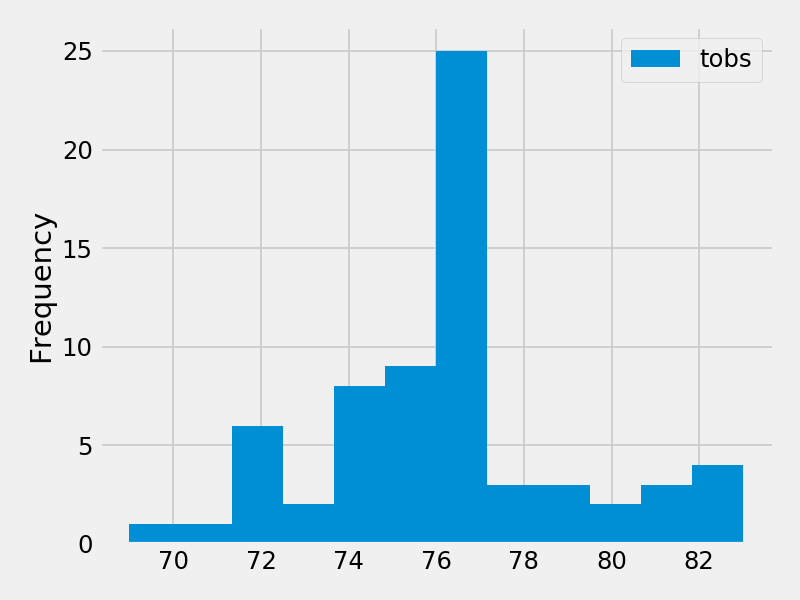

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    start_date = time.strptime(start_date, "%Y-%m-%d")
    end_date = time.strptime(end_date, "%Y-%m-%d")
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
d = dt.date.today() - dt.timedelta(days=365)
print(d)
# print(calc_temps(d, '2012-03-05'))

In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


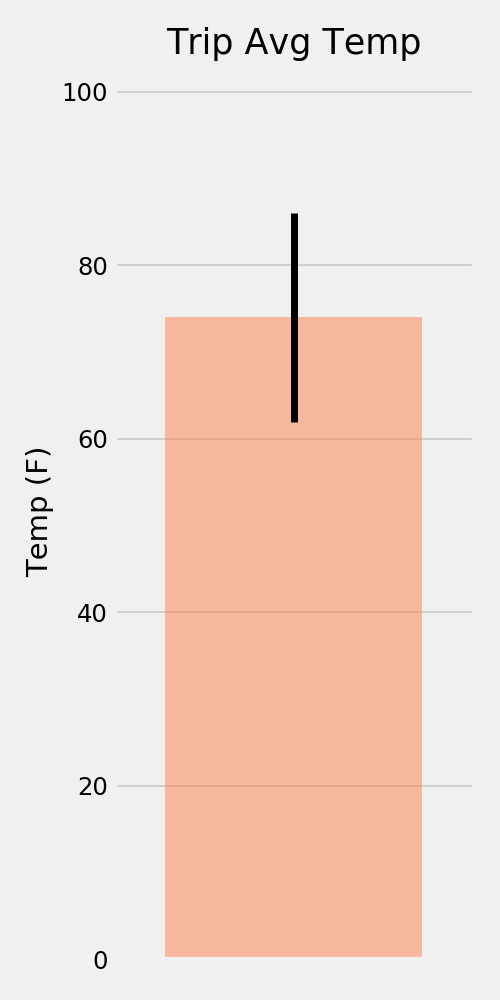

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


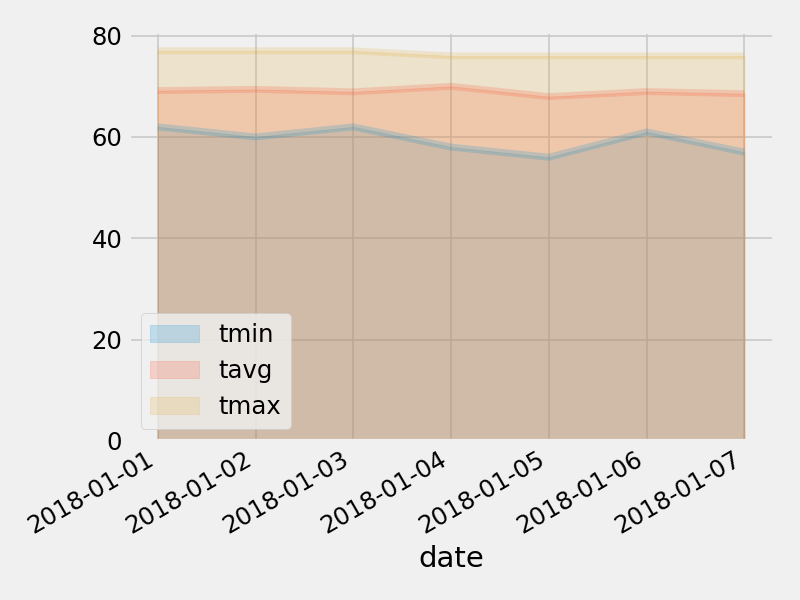

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
